In [86]:
#import libraries
import numpy as np 
import pandas as pd

#import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [87]:
#Load data

iris = pd.read_csv("../input/iris-csv/IRIS.csv")

In [88]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [89]:
#(Q)How many datapoints and features??
iris.shape

(150, 5)

In [90]:
#(Q) What are the column names in our dataset?
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [91]:
iris['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [92]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [93]:
#(Q) How many data points for each class are present? 
#(or) How many flowers for each species are present?
iris['species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: species, dtype: int64

This is a very balanced datasets as the number of data points of every class is 50.

# Scatter Plot

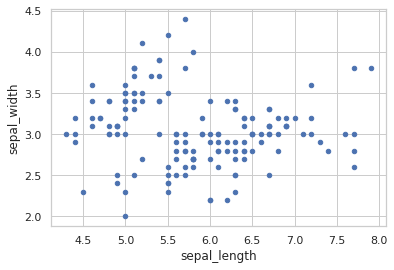

In [94]:
# 2-D Scatter plot
iris.plot(kind = 'scatter', x = 'sepal_length', y = 'sepal_width')
plt.show()


But this scatter plot does not making any sense, what if we change the colors of the points by their type of flower.

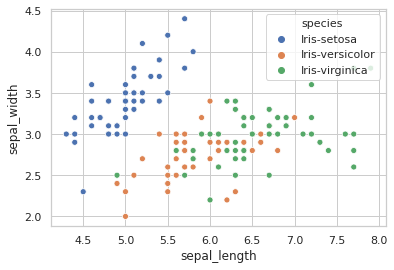

In [95]:
# let us use 'hue' parameter
sns.scatterplot(data = iris, x = 'sepal_length', y = 'sepal_width', hue = 'species')
sns.set(rc={'figure.figsize':(5,5)})
plt.show()

Species of 'Iris Setosa' is in blue color and can be seen seperated form other two flowers 'Iris-Versicolor', 'Iris-Virginica'. 

__Observations:__

1) Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.

2) Seperating Versicolor from Viginica is much harder as they have considerable overlap. 

In [96]:
#import plotly.express as px
#df = px.data.iris()
#fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',size='petal_length', size_max=18,              color='species')
#fig.show()

[3d scatter plots](https://plotly.com/python/3d-scatter-plots/)

3d scatter plots gives us the clear picture of our datasets.

In [97]:
#k = iris.iloc[:,:-1]
#k

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Pair Plot

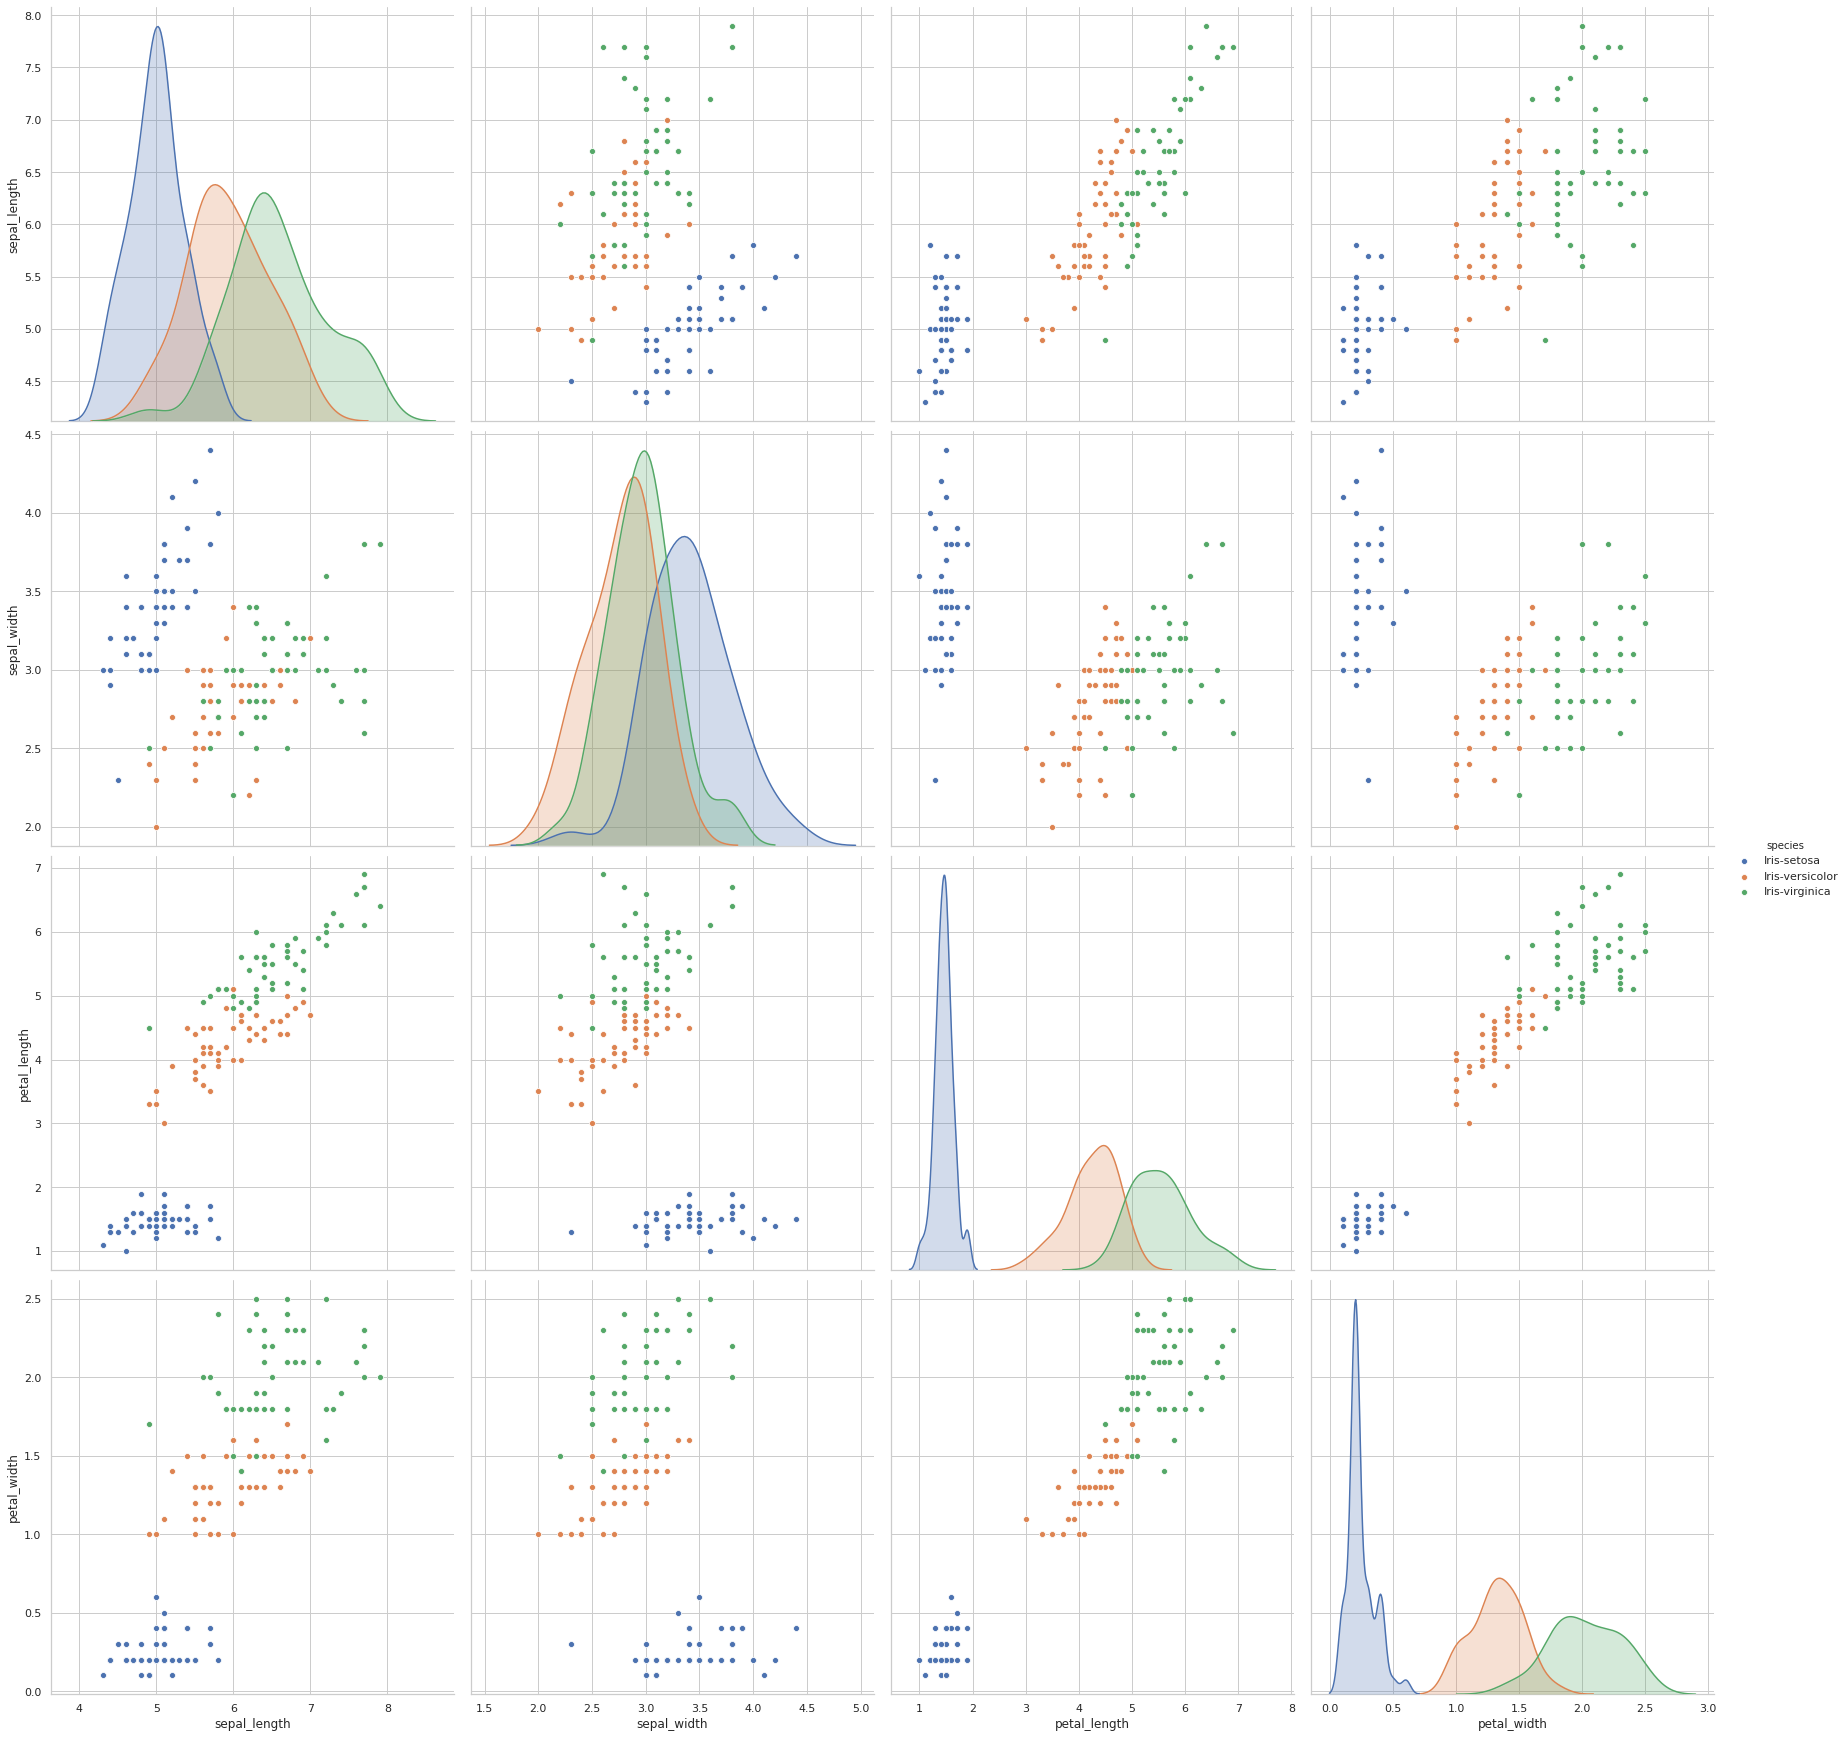

In [98]:
#all the columns excluding id(first column)
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("whitegrid");
sns.pairplot(iris, height = 6, hue = 'species')
plt.show()

Observations

1) petal_length and petal_width are the most useful features to identify various flower types.

2) While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).

3) We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

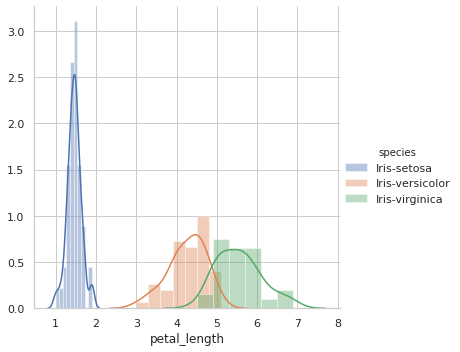

In [101]:
sns.FacetGrid(iris, hue="species", height=5).map(sns.distplot, "petal_length").add_legend();
plt.show();


If petal length is below 2.3, the species of flower is Iris-Setosa

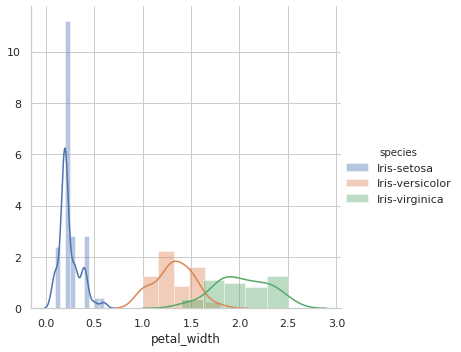

In [102]:
sns.FacetGrid(iris, hue="species", height=5).map(sns.distplot, "petal_width").add_legend();
plt.show()

If petal width is below 0.5 , the species of flower is Iris setosa

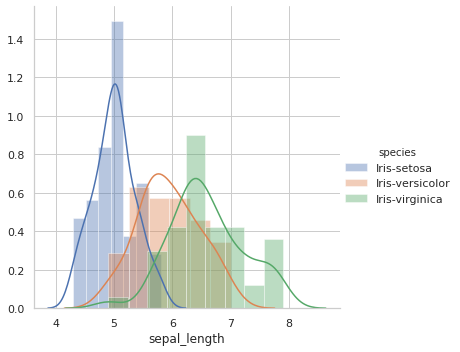

In [103]:
sns.FacetGrid(iris, hue="species", height=5).map(sns.distplot, "sepal_length").add_legend();
plt.show()

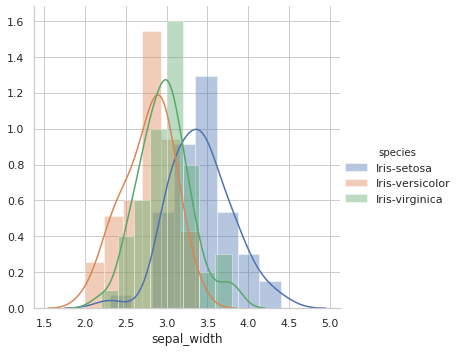

In [104]:
sns.FacetGrid(iris, hue="species", height=5).map(sns.distplot, "sepal_width").add_legend();
plt.show()

Of all the above 4 facetgrid,

we can see that the fourth plot looks like a bell curve.

Is it looking like a Gaussian/Normal distribution?
One of the most frequent distributions in nature.    

[PDF](https://machinelearningmastery.com/probability-density-estimation/)

__Probability Density__

A random variable x has a probability distribution p(x).

The relationship between the outcomes of a random variable and its probability is referred to as the probability density, or simply the “density.”

If a random variable is continuous, then the probability can be calculated via probability density function, or PDF for short. 

__Histogram plots__ provides a fast and reliable way to visualize the probability density of a data sample.

A histogram is a plot that involves first grouping the observations into bins and counting the number of events that fall into each bin. The counts, or frequencies of observations, in each bin are then plotted as a bar graph with the bins on the x-axis and the frequency on the y-axis.

__Plotting CDF of petal_length of all three species of flowers__

[0.02 0.   0.02 0.   0.04 0.   0.14 0.   0.24 0.   0.   0.28 0.   0.14
 0.   0.08 0.   0.   0.   0.04]
[1.    1.045 1.09  1.135 1.18  1.225 1.27  1.315 1.36  1.405 1.45  1.495
 1.54  1.585 1.63  1.675 1.72  1.765 1.81  1.855 1.9  ]


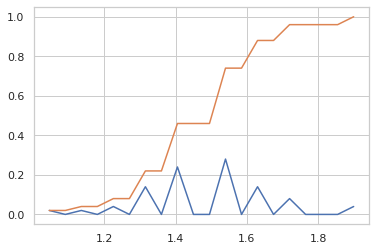

In [118]:

iris_setosa = iris.loc[iris["species"] == "Iris-setosa"]

#Plot CDF of petal_length : Iris setosa
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins = 20, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show()



[0.02 0.   0.04 0.   0.04 0.02 0.02 0.02 0.06 0.1  0.06 0.08 0.04 0.08
 0.14 0.06 0.1  0.04 0.04 0.04]
[3.    3.105 3.21  3.315 3.42  3.525 3.63  3.735 3.84  3.945 4.05  4.155
 4.26  4.365 4.47  4.575 4.68  4.785 4.89  4.995 5.1  ]


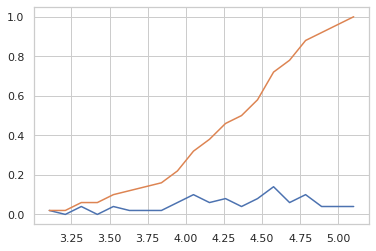

In [120]:
iris_versicolor = iris.loc[iris["species"] == "Iris-versicolor"]

#Plot CDF of petal_length : Iris versicolor
counts, bin_edges = np.histogram(iris_versicolor['petal_length'], bins = 20, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show()


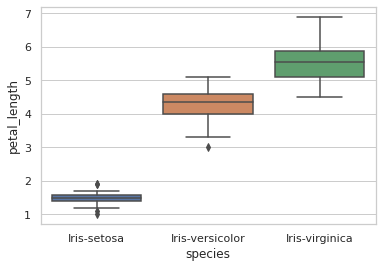

In [129]:
#Box-plot can be visualized as a PDF on the side-ways
sns.boxplot(x='species',y='petal_length', data=iris)
plt.show()

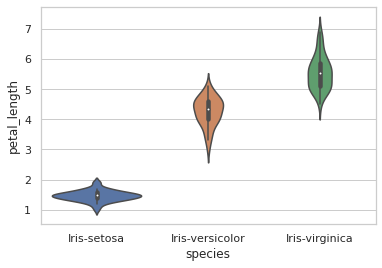

In [130]:
# Denser regions of the data are fatter, and sparser ones thinner in a violin plot

sns.violinplot(x="species", y="petal_length", data=iris, size=8)
plt.show()

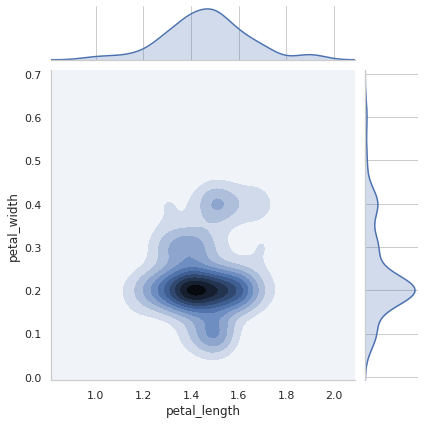

In [131]:
#2D Density plot, contors-plot
iris_setosa = iris.loc[iris["species"] == "Iris-setosa"]
sns.jointplot(x="petal_length", y="petal_width", data=iris_setosa, kind="kde");
plt.show();

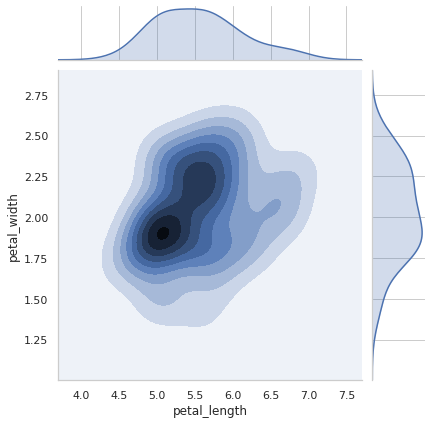

In [132]:
#2D Density plot, contors-plot
iris_versicolor = iris.loc[iris["species"] == "Iris-versicolor"]
sns.jointplot(x="petal_length", y="petal_width", data=iris_versicolor, kind="kde");
plt.show();

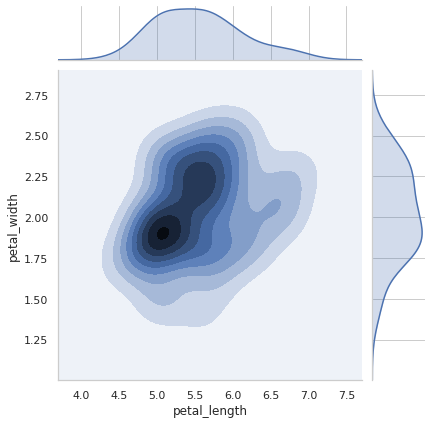

In [133]:
iris_verginica = iris.loc[iris["species"] == "Iris-verginica"]
sns.jointplot(x="petal_length", y="petal_width", data=iris_versicolor, kind="kde");
plt.show();


1) Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.

2) Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.